# Python Implementation of Decision Trees

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the data

In [2]:
# Loading the Instacart datasets into pandas dataframes
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
# Read the data into a dataframe
heart = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Machine Learning Algo/4. Decision Tree/heart_disease.csv", sep=';')

In [6]:
# View the data
heart.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
# View shape of data
heart.shape

(70000, 13)

In [8]:
# View the columns
heart.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [9]:
# View the statistics of data
heart.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# View the count of patients have heart diseaese
heart["cardio"].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

# Exploratory Data Analysis (EDA)

In [11]:
# Check for missing values
print(heart.isnull().sum())

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


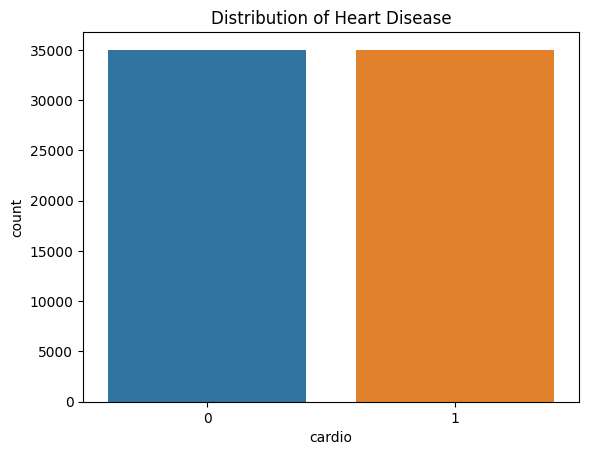

In [12]:
# Visualize the distribution of heart disease cases
sns.countplot(x='cardio', data=heart)
plt.title('Distribution of Heart Disease')
plt.show()

# Data preprocessing

In [13]:
# Convert age from days to years
heart['age'] = heart['age'] // 365

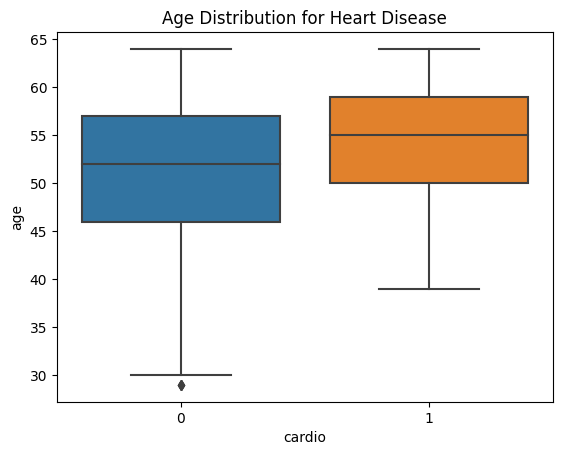

In [14]:
# Visualize the age distribution for heart disease cases
sns.boxplot(x='cardio', y='age', data=heart)
plt.title('Age Distribution for Heart Disease')
plt.show()

In [15]:
y = heart["cardio"]

In [20]:
x = heart.drop("cardio",axis = 1)
x.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0,50,2,168,62.0,110,80,1,1,0,0,1
1,1,55,1,156,85.0,140,90,3,1,0,0,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0
3,3,48,2,169,82.0,150,100,1,1,0,0,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0


## Train a simple Decision tree model

In [19]:
# load sklearn libraries required to construct a Decision Tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [21]:
# Split the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=0)

In [23]:
# View the shape of training data
x_train.shape

(56000, 12)

In [24]:
# View the shape of test data
x_test.shape

(14000, 12)

# Decision Tree

In [25]:
# Create a Decision Tree
dt_basic = DecisionTreeClassifier() #i'm not taking anything so it'll take default values

In [32]:
# View the attributes of tree created
print(dt_basic)

# Access the default parameter values
print("criterion:", dt_basic.criterion)
print("max_depth:", dt_basic.max_depth)
print("min_samples_split:", dt_basic.min_samples_split)
# Add more parameters as needed

DecisionTreeClassifier()
criterion: gini
max_depth: None
min_samples_split: 2


In [33]:
# Fit the training data
dt_basic.fit(x_train,y_train)

DecisionTreeClassifier()

In [34]:
# Predict based on test data
y_preds = dt_basic.predict(x_test)

In [35]:
# View the predictions
print(y_preds)

[0 0 1 ... 1 0 0]


# Accuracy

In [36]:
# Calculate Accuracy
accuracy = accuracy_score(y_test, y_preds)

In [37]:
# View the accuracy
print(accuracy)

0.6356428571428572


# Confusion Matrix 

In [39]:

# Create the confusion matrix
cm = confusion_matrix(y_test, y_preds)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[4464 2605]
 [2496 4435]]


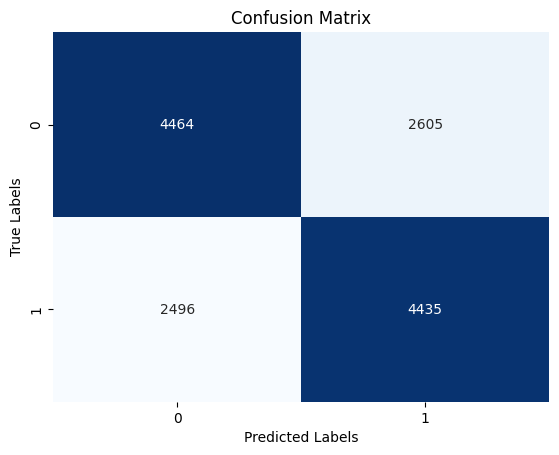

In [40]:
# Create a heatmap of the confusion matrix for better visualization
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [42]:
# Generate the classification report
report = classification_report(y_test, y_preds)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.64      0.63      0.64      7069
           1       0.63      0.64      0.63      6931

    accuracy                           0.64     14000
   macro avg       0.64      0.64      0.64     14000
weighted avg       0.64      0.64      0.64     14000



In [41]:

# Get the number of nodes in the tree
num_nodes = dt_basic.tree_.node_count

# Print the number of nodes
print("Number of nodes in the tree:", num_nodes)

Number of nodes in the tree: 29011


## Visualize the Tree

In [44]:
# Importing required packages for visualization
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report
from IPython.display import Image
import pydotplus
import graphviz
import io

In [46]:
# Export the decision tree as dot file
dot_data = export_graphviz(dt_basic, out_file=None, filled=True, rounded=True,
                           special_characters=True, feature_names=x_train.columns)

# Create a graph from dot data
graph = pydotplus.graph_from_dot_data(dot_data)

# Show the decision tree image
Image(graph.create_png())

KeyboardInterrupt: ignored

As you saw above, in this case, if the data is large, the tree formed is difficult to visualize and prone to overfitting.

## Hyperparamter Tuning Optimization 

### Max_depth

First we will start with Decision Tree max depth parameter

Here's a list of common parameters for a decision tree model:

    Criterion: The criterion used to measure the quality of a split at each node (e.g., "gini" or "entropy").
    Max depth: The maximum depth of the decision tree.
    Min samples split: The minimum number of samples required to perform a split at a node.
    Min samples leaf: The minimum number of samples required to form a leaf node.
    Max features: The maximum number of features considered for splitting at each node.
    Class weights: Weights assigned to different classes in the target variable.
    Random state: The random seed used for random decisions in the algorithm.

In [68]:
#Choose and mention the hyperparameter
parameters = {'max_depth': range(1,10)} # we gave 1 to 10 depth range to choose from

In [69]:
parameters

{'max_depth': range(1, 10)}

In [52]:
#You can define number of folds for cross-validation as follows:
n_folds = 5

In [70]:
#Build a Decision Tree

dtree = DecisionTreeClassifier(criterion='gini', random_state=0)

In [58]:
dtree

DecisionTreeClassifier(random_state=0)

In [59]:
default_params = dtree.get_params()

# Print the default parameter values
print("Default Parameters:")
for param, value in default_params.items():
    print(f"{param}: {value}")

Default Parameters:
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
random_state: 0
splitter: best


In [60]:
#Import the required libraries
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [71]:

#Use GridSearchCV to implement max_depth as follows:
tree=GridSearchCV(dtree,parameters,cv=n_folds,scoring="accuracy",return_train_score=True)

GridSearchCV performs an exhaustive search over all possible combinations of hyperparameter values specified in the parameters dictionary. It fits the dtree model with each combination of hyperparameter values, performs cross-validation using cv number of folds, and computes the performance metric specified by scoring for each combination of hyperparameters. Finally, it returns the best combination of hyperparameters based on the performance metric chosen, which can be accessed using the best_params_ attribute of the GridSearchCV object.

In [63]:
tree

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max depth': range(1, 10)}, return_train_score=True,
             scoring='accuracy')

In [72]:
#Fit the training data
tree.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(1, 10)}, return_train_score=True,
             scoring='accuracy')

In [73]:
#View the score
scores = tree.cv_results_

In [77]:
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.038226,0.018563,0.004873,0.001106,1,{'max_depth': 1},0.711607,0.718839,0.708661,0.711875,...,0.713946,0.004116,8,0.714531,0.712723,0.715268,0.714464,0.712746,0.713946,0.001029
1,0.045503,0.000518,0.004376,0.000054,2,{'max_depth': 2},0.711607,0.718839,0.708661,0.711875,...,0.713946,0.004116,8,0.714531,0.712723,0.715268,0.714464,0.712746,0.713946,0.001029
2,0.063488,0.001398,0.004576,0.000060,3,{'max_depth': 3},0.724375,0.731071,0.719554,0.726696,...,0.725875,0.003825,7,0.726250,0.724576,0.727455,0.725670,0.725424,0.725875,0.000956
3,0.079037,0.002276,0.004576,0.000092,4,{'max_depth': 4},0.731875,0.731339,0.726607,0.727857,...,0.729982,0.002298,4,0.731830,0.729643,0.730759,0.730446,0.729353,0.730406,0.000877
4,0.096132,0.003516,0.004580,0.000095,5,{'max_depth': 5},0.728482,0.734464,0.729286,0.727321,...,0.730464,0.002702,3,0.733058,0.733214,0.735089,0.734420,0.732790,0.733714,0.000886


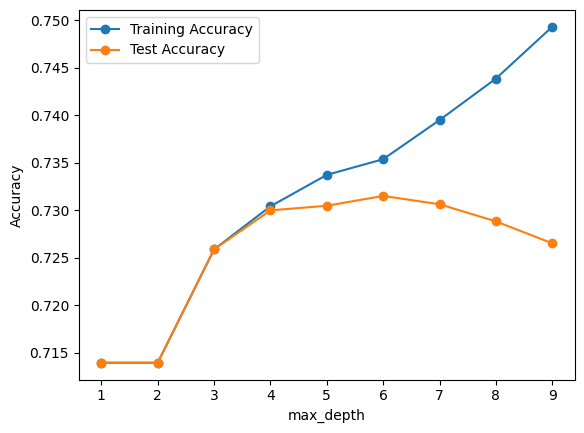

In [75]:
import matplotlib.pyplot as plt

# Access the grid search results
scores = tree.cv_results_

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the training accuracy
ax.plot(scores["param_max_depth"].data, scores["mean_train_score"], label="Training Accuracy", marker='o')

# Plot the test accuracy
ax.plot(scores["param_max_depth"].data, scores["mean_test_score"], label="Test Accuracy", marker='o')

# Set labels for x-axis and y-axis
ax.set_xlabel("max_depth")
ax.set_ylabel("Accuracy")

# Add a legend
ax.legend()

# Show the plot
plt.show()


In [103]:
tree.best_params_

{'max_depth': 6}

### Min_samples_leaf

In [88]:
# Choose and mention the hyperparameter
parameters = {'min_samples_leaf': range (10,200,20)}

In [89]:
n_folds = 5

In [91]:
dtree = DecisionTreeClassifier(criterion = 'gini', random_state= 0)

In [95]:
tree2=GridSearchCV(dtree,parameters,cv=n_folds,scoring="accuracy",return_train_score=True)

In [96]:
tree2.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'min_samples_leaf': range(10, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [97]:
#View the score
scores = tree2.cv_results_

In [98]:
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.274123,0.005062,0.008089,0.000893,10,{'min_samples_leaf': 10},0.689911,0.683482,0.675804,0.671429,...,0.679304,0.006571,10,0.795603,0.796429,0.797589,0.796808,0.794531,0.796192,0.001048
1,0.227651,0.010769,0.006747,0.000516,30,{'min_samples_leaf': 30},0.718304,0.722589,0.718304,0.714107,...,0.716929,0.003874,9,0.757545,0.758728,0.758281,0.759576,0.757478,0.758321,0.000782
2,0.199967,0.005649,0.005922,0.000421,50,{'min_samples_leaf': 50},0.725357,0.728482,0.726964,0.724107,...,0.725589,0.001951,8,0.749062,0.749799,0.750223,0.749531,0.749397,0.749603,0.000391
3,0.189495,0.001510,0.006075,0.000846,70,{'min_samples_leaf': 70},0.729821,0.730089,0.726964,0.728393,...,0.728000,0.001979,7,0.744888,0.745268,0.745804,0.746451,0.745156,0.745513,0.000555
4,0.180160,0.004018,0.005601,0.000191,90,{'min_samples_leaf': 90},0.732589,0.734018,0.726964,0.729732,...,0.730786,0.002426,3,0.743393,0.742500,0.743996,0.743705,0.742746,0.743268,0.000566


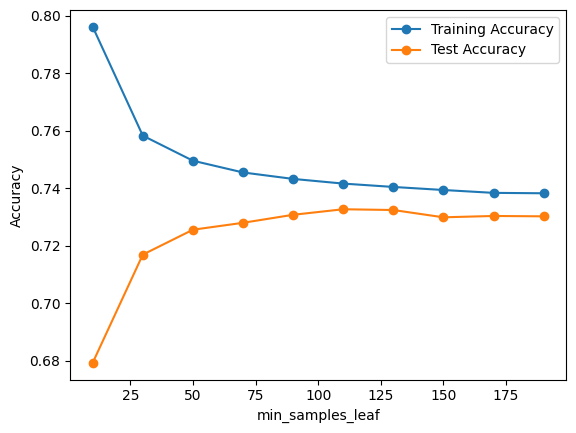

In [101]:
import matplotlib.pyplot as plt

# Access the grid search results
scores = tree2.cv_results_

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the training accuracy
ax.plot(scores["param_min_samples_leaf"].data, scores["mean_train_score"], label="Training Accuracy", marker='o')

# Plot the test accuracy
ax.plot(scores["param_min_samples_leaf"].data, scores["mean_test_score"], label="Test Accuracy", marker='o')

# Set labels for x-axis and y-axis
ax.set_xlabel("min_samples_leaf")
ax.set_ylabel("Accuracy")

# Add a legend
ax.legend()

# Show the plot
plt.show()


    At low min_sample_leaf value, the tree will be huge, i.e., it will cover each data point. 
    This will lead to the training accuracy of 100% but test accuracy of almost 0%.
    WIth an increase in the min_sample_leaf value, 
    the test accuracy increases, as overfitting decreases and the model becomes less complex.
    Therefore, the most optimal value of the min_sample_leaf parameter is 170.

In [102]:
tree2.best_params_

{'min_samples_leaf': 110}

This process looks tedious, can't check one by one. So for that we create Parameter Grid

# Multiple parameters

In [106]:
# Create a Parameter grid
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': range(5,15,5),
              'min_samples_split': range(50,150,50),
              'min_samples_leaf': range(50,150,50),
              'max_features': ['auto', 'sqrt', 'log2']}

max_features is a hyperparameter in decision trees that determines the number of features to consider when looking for the best split. It is used to control the feature selection process during tree construction. The three options for max_features in scikit-learn's implementation of decision trees are:

    'auto': This option considers all features for finding the best split. 
    It is equivalent to setting max_features to the total number of features in the dataset.
    'sqrt': This option considers the square root of the total number of features for finding the best split.
    'log2': This option considers the logarithm base 2 of the total number of features for finding the best split.

In [107]:
param_grid

{'criterion': ['gini', 'entropy'],
 'max_depth': range(5, 15, 5),
 'min_samples_split': range(50, 150, 50),
 'min_samples_leaf': range(50, 150, 50),
 'max_features': ['auto', 'sqrt', 'log2']}

In [108]:
n_fold = 5

In [109]:
# Create a Decision Tree
dtree = DecisionTreeClassifier()

In [110]:
dtree

DecisionTreeClassifier()

In [111]:
grid =GridSearchCV(dtree,param_grid,cv=n_fold, n_jobs = -1)

n_jobs: The number of CPU cores to use for parallelizing the grid search. Setting it to -1 means to use all available CPU cores.

In [112]:
grid.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 15, 5),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)})

In [113]:
#View the score
scores = grid.cv_results_

In [114]:
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.096784,0.052059,0.011415,0.008016,gini,5,auto,50,50,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.728929,0.713571,0.713304,0.714911,0.680536,0.710250,0.015962,37
1,0.081013,0.026103,0.009119,0.002929,gini,5,auto,50,100,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.716071,0.731161,0.719464,0.683125,0.733304,0.716625,0.018000,28
2,0.109017,0.028617,0.013161,0.007928,gini,5,auto,100,50,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.693393,0.720268,0.704911,0.725268,0.719375,0.712643,0.011775,33
3,0.073689,0.032298,0.010139,0.004225,gini,5,auto,100,100,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.719732,0.711161,0.710625,0.702589,0.647500,0.698321,0.025983,46
4,0.097254,0.020576,0.011166,0.004937,gini,5,sqrt,50,50,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.722321,0.712054,0.697857,0.670000,0.723839,0.705214,0.019902,41


In [115]:
# best params
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 100,
 'min_samples_split': 100}

In [116]:
grid.best_score_

0.7261428571428571

In [117]:
best_grid = grid.best_estimator_

In [118]:
best_grid

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto',
                       min_samples_leaf=100, min_samples_split=100)

In [124]:
best_grid.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto',
                       min_samples_leaf=100, min_samples_split=100)

In [126]:
best_grid.score(x_test,y_test)

0.728

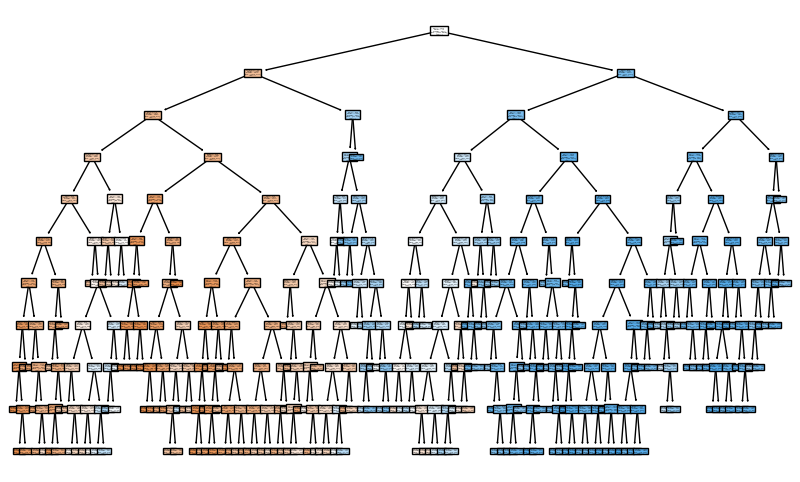

In [132]:
#visulaise the tree
# Visualize the decision tree
from sklearn import tree
import matplotlib.pyplot as plt

from sklearn import tree
import matplotlib.pyplot as plt
# Convert feature names and class names to strings
feature_names = list(x.columns)
class_names = list(map(str, y.unique()))

# Visualize the decision tree
plt.figure(figsize=(10, 6))
tree.plot_tree(best_grid, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()

In [133]:
# Predict based on test data
y_preds = best_grid.predict(x_test)

In [134]:

# Create the confusion matrix
cm = confusion_matrix(y_test, y_preds)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[5503 1566]
 [2242 4689]]


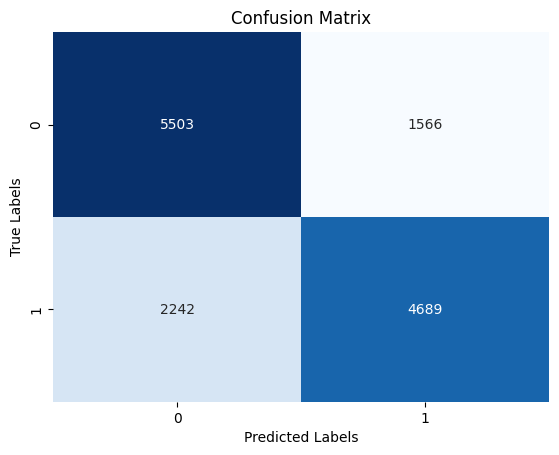

In [135]:
# Create a heatmap of the confusion matrix for better visualization
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [136]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      7069
           1       0.75      0.68      0.71      6931

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



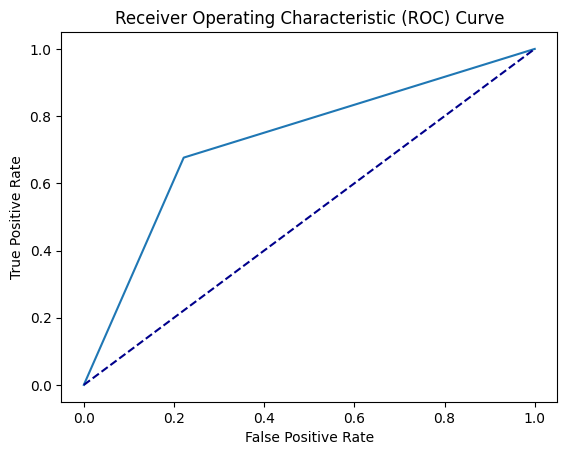

In [137]:
#Plot ROC curve

#import the required libraries:
import matplotlib.pyplot as plt  
import sklearn.metrics as metrics

#Define false and true positive rate as follows:
fpr, tpr, thresholds=metrics.roc_curve(y_test,y_preds) 
#Plot the ROC curve:
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

The area under the ROC curve increases with hyperparameter tuning, showing the improvement in the performance of the model.